To disable all warnings:

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Minimum Spanning Tree Problem

In this tutorial, we will use the Python library "GraphUtilitiesPython" to generate graphs.

In [2]:
import sys
#sys.path.append("<InstallPath>\GraphUtilitiesPython")
#To avoid character encoding issues:
#for example, you can use "\U" instead of "U"
#or simply replace all "\" by "\\"
#for example,
sys.path.append("C:\\Users\\user\\GraphUtilitiesPython")

In [3]:
import numpy as np
from graphutilitiespy import Drawing
from graphutilitiespy import Graphs

The Python library "NetworkX" is required to solve the minimum spanning tree problem. 

In [4]:
import networkx as nx

# Problem 02

A company wants to group its customers based on sales data from the last two years. The following data is intended to be analyzed based on total product sales(TQ) and turnover(TV).    

The Python libraries "Pandas" and "Matplotlib" are used to import and visualize data.

<Axes: xlabel='Normalized_TQ', ylabel='Normalized_TV'>

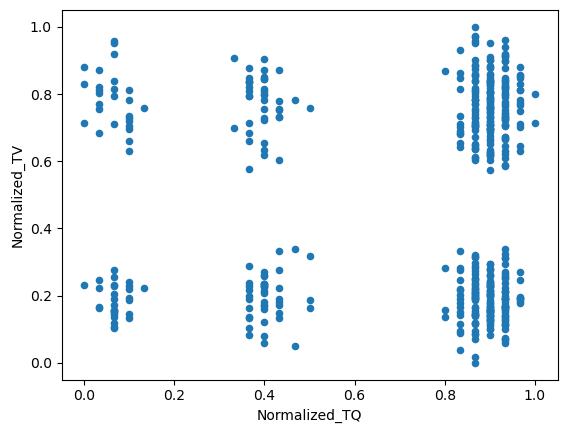

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df  = pd.read_csv("SalesData.csv")
df.plot(kind='scatter',x='Normalized_TQ',y='Normalized_TV')

Now, we can define the positions(as the coordinates "x,y" on a 2D plane) of the nodes(vertices).

In [6]:
vertices = df[['Normalized_TQ', 'Normalized_TV']].dropna().to_numpy()
nodepos = vertices

In [7]:
distancetype = 'Euclidian'
drawnodes = False
writeedgelabels = False

In [8]:
G1 = Drawing.draw_completesimplegraph(vertices, nodepos, distancetype, drawnodes, writeedgelabels)

Euclidian distance selected..

Creating a complete simple graph..



To get information on the graph "G1":

In [9]:
print(G1)

Graph with 500 nodes and 124750 edges


To get the sparse adjacency matrix (in compressed sparse row format) of the graph "G1":

In [10]:
G1Adj = nx.adjacency_matrix(G1)
print(G1Adj)

  (0, 1)	0.07
  (0, 2)	0.42
  (0, 3)	0.07
  (0, 4)	0.57
  (0, 5)	0.59
  (0, 6)	0.47
  (0, 7)	0.38
  (0, 8)	0.18
  (0, 9)	0.08
  (0, 10)	0.14
  (0, 11)	0.1
  (0, 12)	0.06
  (0, 13)	0.81
  (0, 14)	0.41
  (0, 15)	0.12
  (0, 16)	0.73
  (0, 17)	0.55
  (0, 18)	0.18
  (0, 19)	0.08
  (0, 20)	0.09
  (0, 21)	0.05
  (0, 22)	0.03
  (0, 23)	0.64
  (0, 24)	0.77
  (0, 25)	0.42
  :	:
  (499, 474)	0.85
  (499, 475)	0.15
  (499, 476)	0.5
  (499, 477)	0.54
  (499, 478)	0.54
  (499, 479)	0.1
  (499, 480)	0.06
  (499, 481)	0.69
  (499, 482)	0.53
  (499, 483)	0.69
  (499, 484)	0.45
  (499, 485)	0.8
  (499, 486)	0.52
  (499, 487)	0.42
  (499, 488)	0.17
  (499, 489)	0.08
  (499, 490)	0.5
  (499, 491)	0.53
  (499, 492)	1.04
  (499, 493)	0.84
  (499, 494)	1.0
  (499, 495)	0.07
  (499, 496)	0.44
  (499, 497)	0.01
  (499, 498)	0.46


To have the adjacency matrix of the graph "G1" in dense form:

In [11]:
G1_dense = np.array(G1Adj.todense())
print(G1_dense)

[[0.   0.07 0.42 ... 0.53 0.07 0.52]
 [0.07 0.   0.43 ... 0.54 0.08 0.53]
 [0.42 0.43 0.   ... 0.11 0.36 0.1 ]
 ...
 [0.53 0.54 0.11 ... 0.   0.47 0.01]
 [0.07 0.08 0.36 ... 0.47 0.   0.46]
 [0.52 0.53 0.1  ... 0.01 0.46 0.  ]]


In [12]:
mst = nx.minimum_spanning_tree(G1, weight='weight')

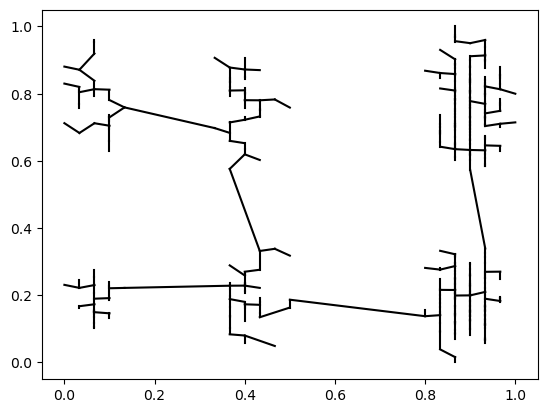

In [13]:
for l in mst.edges:
    fromnode = l[0]
    tonode = l[1]
    xs = (nodepos[fromnode][0],nodepos[tonode][0])
    ys = (nodepos[fromnode][1],nodepos[tonode][1])
    line = [xs,ys]
    plt.plot(*line, color="black")